In [1]:
from ecallisto_ng.combine_antennas.virtualantenna import EcallistoVirtualAntenna
from datetime import datetime
from ecallisto_ng.data_download.downloader import (
    get_ecallisto_data,
)
import numpy as np
from ecallisto_ng.plotting.plotting import plot_spectogram, plot_spectogram_mpl
from ecallisto_ng.data_processing.utils import subtract_low_signal_noise_background, subtract_constant_background, min_max_scale_per_column, apply_median_filter

In [2]:
def rolling_mean_std(df):
    # Calculate rolling standard deviation for each frequency
    rolling_std = df.rolling(f'10s').std()

    # Average the standard deviations across all frequencies at each time point
    average_rolling_std = rolling_std.mean(axis=1)

    # If you need a single average value across all time points and frequencies
    overall_average_std = average_rolling_std.mean()
    return overall_average_std

def sum_gradient_magnitude(df):
    # Assuming `image` is your 2D numpy array representing the image
    grad_y, grad_x = np.gradient(df.values)

    # Calculate the magnitude of the gradient
    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # If you want to sum the gradient magnitudes
    return np.sum(grad_magnitude)

In [3]:
# 20230810	02:45-02:59
start_datetime = datetime(2023, 8, 10, 2, 30)
end_datetime = datetime(2023, 8, 10, 3, 00)
substrings_to_get = ['ASSA', 'ALASKA-HAARP', 'ALASKA-COHOE']
# Download all available data
datas = []
for substring in substrings_to_get:
    dfs = get_ecallisto_data(start_datetime, end_datetime, substring)
    if isinstance(dfs, dict):
        datas.extend(dfs.values())
    else:
        datas.append(dfs)

C:\Users\vince\AppData\Local\Temp\ipykernel_32348\949012211.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


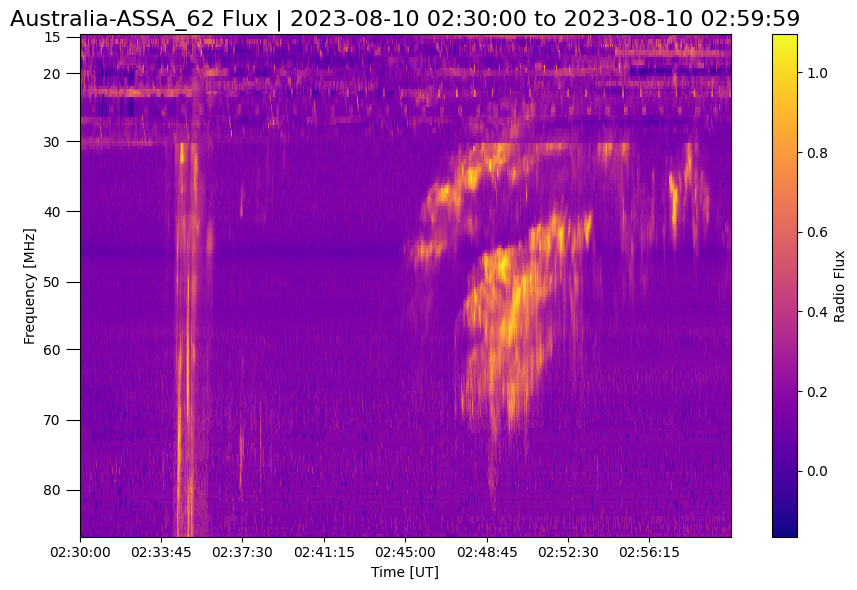

In [4]:
for data in datas:
    df = subtract_constant_background(data)
    df = subtract_low_signal_noise_background(df)
    df = min_max_scale_per_column(df)
    df = apply_median_filter(df, (3,3))
    fig = plot_spectogram_mpl(subtract_low_signal_noise_background(df))
    fig.show()
    break

In [21]:
eva = EcallistoVirtualAntenna(freq_range=[20, 80], filter_type='median', filter_size=(12, 12))

In [22]:
datas_ready, _ = eva.preprocess_match_sync(datas, method='round', bin_width=0.2)

Combining 7 spectograms.
Skipping Australia-ASSA_60 it has only 0 / 30 frequencies
Binning the frequencies with a bin width of 0.2.
Matching and syncing the spectograms.
Reference spectogram is Australia-ASSA.


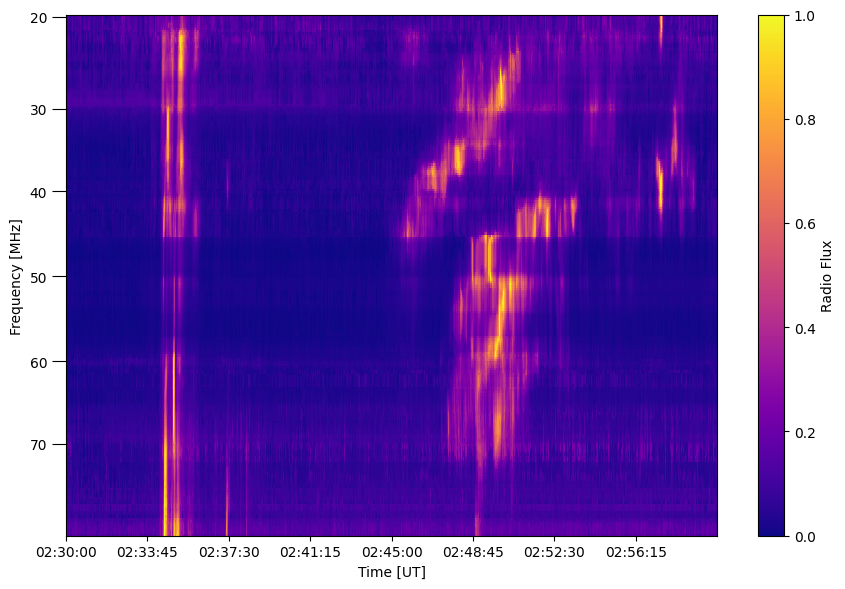

In [24]:
res = eva.combine(datas_ready, quantile=0.4)
fig = plot_spectogram_mpl(res, title=None)

Epoch 0, Loss: 0.3291938006877899
Epoch 10, Loss: 0.26335158944129944
Epoch 20, Loss: 0.20848138630390167
Epoch 30, Loss: 0.16246230900287628
Epoch 40, Loss: 0.12466762214899063
Epoch 50, Loss: 0.0947645977139473
Epoch 60, Loss: 0.07244763523340225
Epoch 70, Loss: 0.05733715370297432
Epoch 80, Loss: 0.048741430044174194
Epoch 90, Loss: 0.045144692063331604
Epoch 100, Loss: 0.04434262216091156
Epoch 110, Loss: 0.043873269110918045
Epoch 120, Loss: 0.04367786645889282
Epoch 130, Loss: 0.043577272444963455
Epoch 140, Loss: 0.04353418946266174
Epoch 150, Loss: 0.04351503774523735
Epoch 160, Loss: 0.04350763559341431
Epoch 170, Loss: 0.043505534529685974
Epoch 180, Loss: 0.04350563511252403
Epoch 190, Loss: 0.04350656643509865


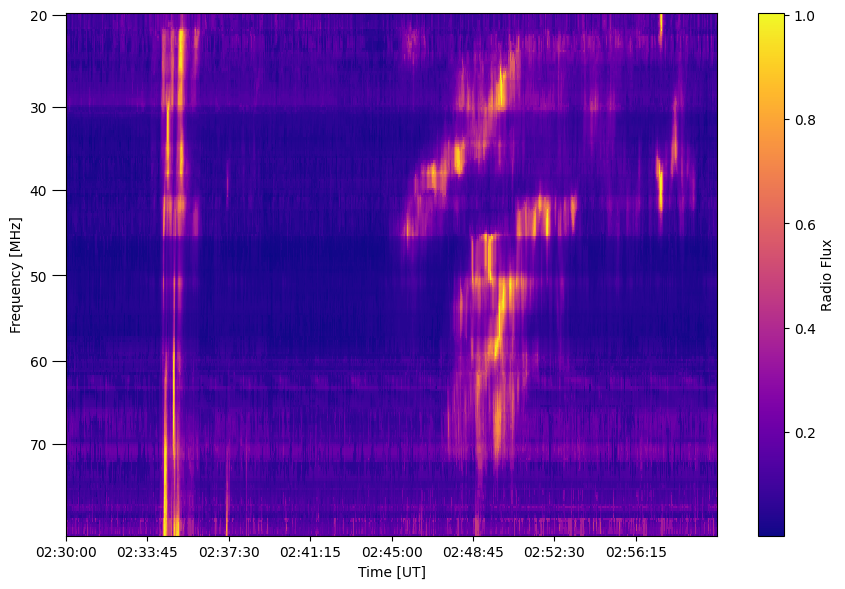

In [25]:
res = eva.combine(datas_ready, method='loss', epochs=200, ignore_ratio=0.1, grad_penalty_weight=0.01)
fig = plot_spectogram_mpl(res, title=None)

In [32]:
# 20230810	02:45-02:59
start_datetime = datetime(2024, 2, 17, 13, 15, 0)
end_datetime = datetime(2024, 2, 17, 13, 48, 0)
substrings_to_get = ['SWISS', 'GERMANY', 'AUSTRIA', 'GLASGOW', 'EGYPT', 'ETHIOPIA', 'DENMARK', 'SPAIN', 'TRIEST', 'KRIM']
# Download all available data
datas = []
for substring in substrings_to_get:
    dfs = get_ecallisto_data(start_datetime, end_datetime, substring)
    if isinstance(dfs, dict):
        datas.extend(dfs.values())
    else:
        datas.append(dfs)

In [33]:
datas_ready, _ = eva.preprocess_match_sync(datas, method='round', bin_width=0.2)

Combining 25 spectograms.
Skipping SWISS-MUHEN_03 it has only 0 / 30 frequencies
Skipping GERMANY-DLR_01 it has only 0 / 30 frequencies
Skipping GERMANY-DLR_02 it has only 8 / 30 frequencies
Skipping GERMANY-DLR_03 it has only 0 / 30 frequencies
Skipping AUSTRIA-Krumbach_10 it has only 17 / 30 frequencies
Skipping AUSTRIA-MICHELBACH_01 it has only 0 / 30 frequencies
Skipping AUSTRIA-OE3FLB_55 it has only 10 / 30 frequencies
Skipping TRIEST_59 it has only 0 / 30 frequencies
Skipping TRIEST_60 it has only 0 / 30 frequencies
Binning the frequencies with a bin width of 0.2.
Matching and syncing the spectograms.
Reference spectogram is SWISS-Landschlacht.


In [34]:
res = eva.combine(datas_ready, quantile=0.2)

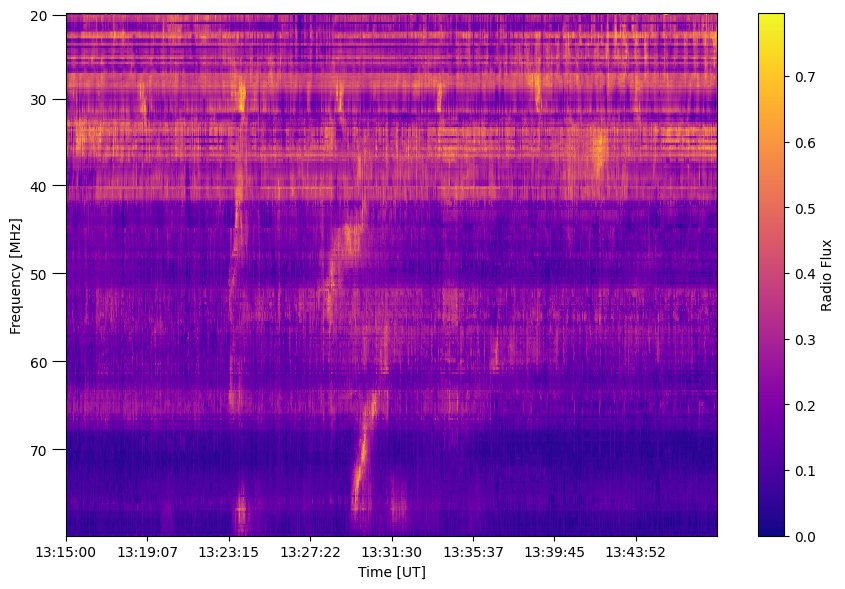

In [35]:
fig = plot_spectogram_mpl(res, title=None)

In [36]:
# 20230810	02:45-02:59
start_datetime = datetime(2024, 2, 16, 6, 45, 0)
end_datetime = datetime(2024, 2, 16, 7, 16, 0)
substrings_to_get = [
    "ALMATY", "AUSTRIA-MICHELBACH", "AUSTRIA-UNIGRAZ", "Australia-ASSA",
    "EGYPT-Alexandria", "GERMANY-DLR", "HUMAIN", "HURBANOVO", "INDIA-GAURI",
    "INDIA-OOTY", "INDIA-UDAIPUR", "KASI", "MONGOLIA-UB", "MRO", "MRT3",
    "Malaysia-Banting", "ROMANIA", "SSRT", "SWISS-IRSOL", "SWISS-Landschlacht",
    "TRIEST"
]
# Download all available data
datas = []
for substring in substrings_to_get:
    dfs = get_ecallisto_data(start_datetime, end_datetime, substring)
    if isinstance(dfs, dict):
        datas.extend(dfs.values())
    else:
        datas.append(dfs)

In [37]:
eva = EcallistoVirtualAntenna(freq_range=[20, 80], filter_type='median', filter_size=(12,12))

In [38]:
datas_ready, _ = eva.preprocess_match_sync(datas, method='round', bin_width=0.2)

Combining 39 spectograms.
Skipping ALMATY_59 it has only 0 / 30 frequencies
Skipping AUSTRIA-MICHELBACH_01 it has only 0 / 30 frequencies
Skipping Australia-ASSA_56 it has only 0 / 30 frequencies
Skipping Australia-ASSA_57 it has only 0 / 30 frequencies
Skipping GERMANY-DLR_01 it has only 0 / 30 frequencies
Skipping GERMANY-DLR_02 it has only 8 / 30 frequencies
Skipping GERMANY-DLR_03 it has only 0 / 30 frequencies
Skipping KASI_59 it has only 24 / 30 frequencies
Skipping MRO_59 it has only 8 / 30 frequencies
Skipping MRO_60 it has only 8 / 30 frequencies
Skipping MRT3_02 it has only 9 / 30 frequencies
Skipping Malaysia-Banting_01 it has only 0 / 30 frequencies
Skipping SSRT_59 it has only 24 / 30 frequencies
Skipping TRIEST_59 it has only 0 / 30 frequencies
Skipping TRIEST_60 it has only 0 / 30 frequencies
Binning the frequencies with a bin width of 0.2.
Matching and syncing the spectograms.
Reference spectogram is Australia-ASSA.


In [39]:
res = eva.combine(datas_ready, quantile=0.5)

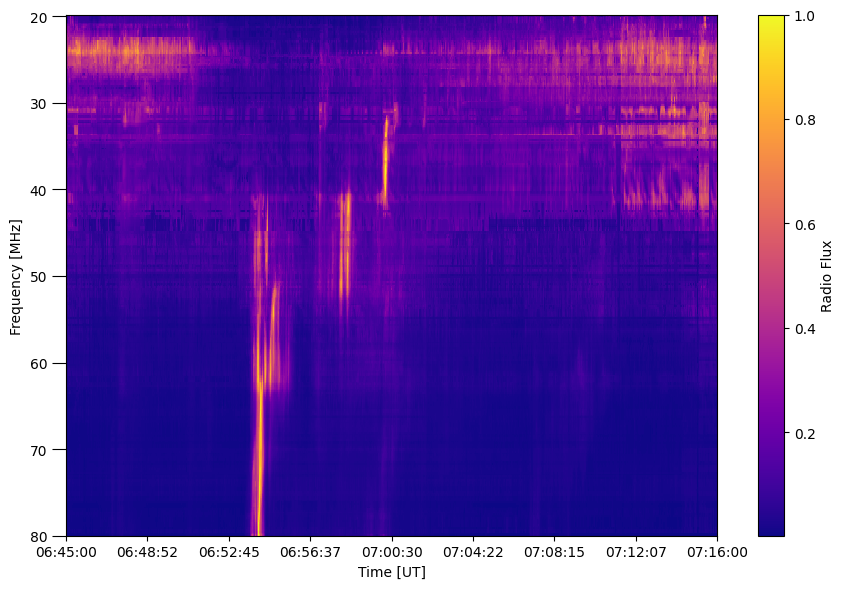

In [40]:
fig = plot_spectogram_mpl(res, title=None)

In [41]:
loss_df = optimize_noise(datas_ready, epochs=100)

NameError: name 'optimize_noise' is not defined

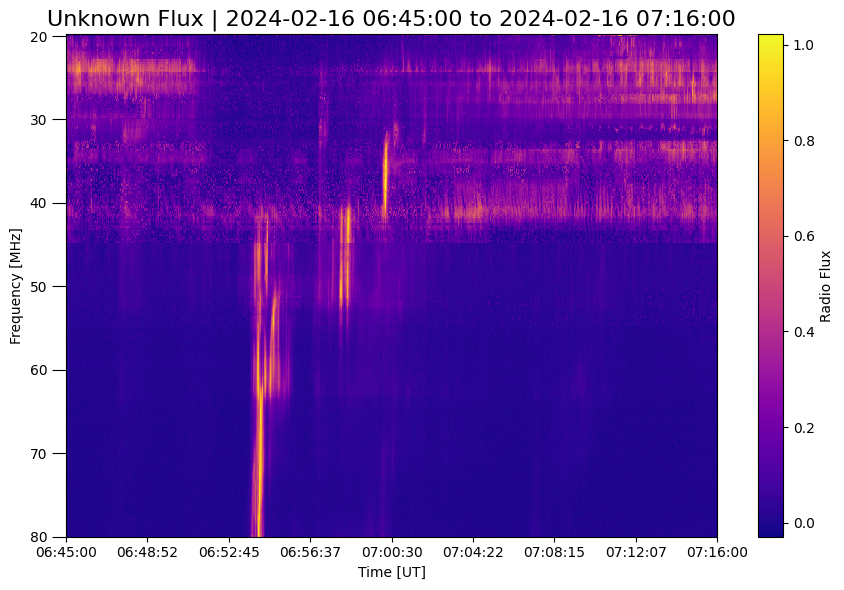

In [ ]:
fig = plot_spectogram_mpl(loss_df)